# Random Forest Classifier

In [86]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_auc_score,roc_curve,auc
from sklearn.metrics import confusion_matrix


import pickle

# 1. BOW

In [15]:
# loading BOW vectors

X_train_bow = pickle.load(open('bow_vectors/X_train_bow','rb'))
X_test_bow = pickle.load(open('bow_vectors/X_test_bow','rb'))
bow_features = pickle.load(open('bow_vectors/bow_features','rb'))

y_train = np.load('split dataset/y_train.npy',allow_pickle = True)
y_test = np.load('split dataset/y_test.npy',allow_pickle = True)

In [21]:
rfr = RandomForestClassifier(n_jobs = -1, class_weight = 'balanced')
num_estimator = [5,10,50,100,120]
maximum_depth = [1, 5, 7, 10, 15, 25, 30]
parameter = {
    'n_estimators': num_estimator,
    'max_depth': maximum_depth
}
grid = GridSearchCV(estimator = rfr , param_grid = parameter , cv =5, n_jobs=-1, scoring= 'roc_auc', return_train_score = True )
grid.fit(X_train_bow,y_train)

print('Best Parameter:',grid.best_params_)

Best Parameter: {'max_depth': 25, 'n_estimators': 120}


In [49]:
train_auc = grid.cv_results_['mean_train_score'].reshape(7,5)
test_auc = grid.cv_results_['mean_test_score'].reshape(7,5)

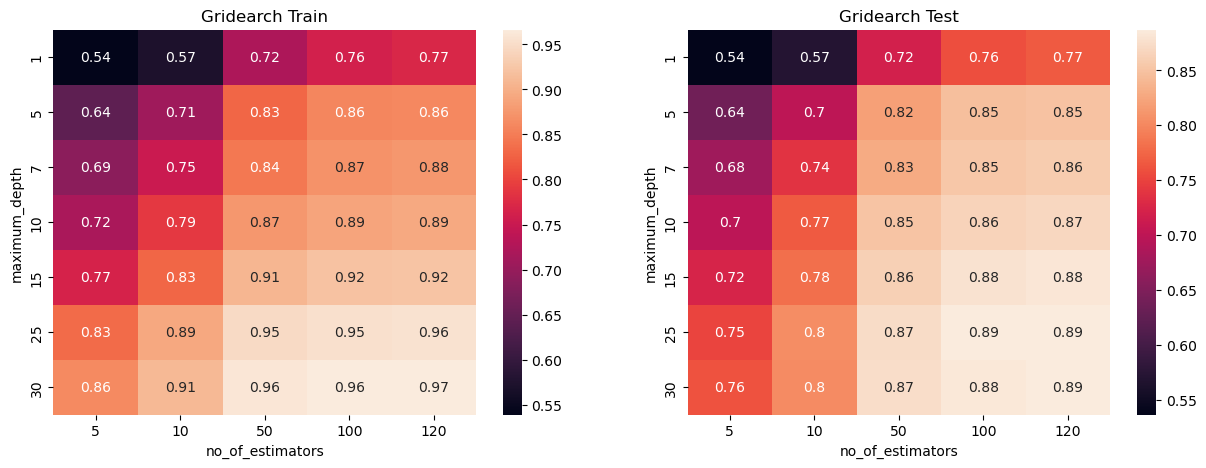

In [59]:
f, axes = plt.subplots(1, 2,figsize=(15,5))

for i in range(2):
    title = train_auc if i ==0 else test_auc
    sns.heatmap(title,xticklabels = num_estimator, yticklabels = maximum_depth, annot =True, ax = axes[i])
    axes[i].set_title(f"Gridearch {'Train' if i==0 else 'Test'}")
    axes[i].set_xlabel("no_of_estimators")
    axes[i].set_ylabel("maximum_depth") 

#### we can see here at maximum depth = 15 and num of estimator = 120 has optimal score on both train and test

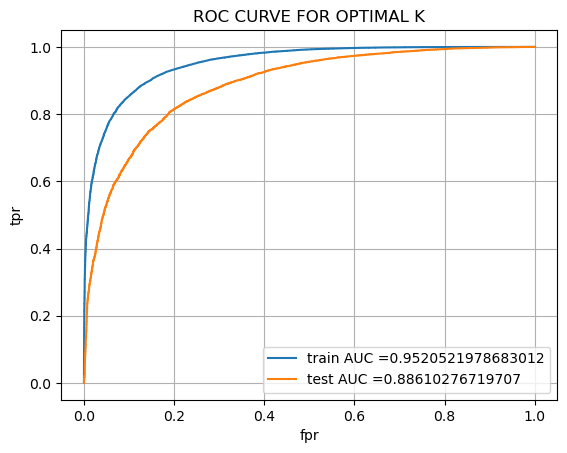

Area under train roc 0.9520521978683012
Area under test roc 0.88610276719707


In [74]:
rfr_bp = RandomForestClassifier(**grid.best_params_,class_weight = 'balanced')
rfr_bp = rfr_bp.fit(X_train_bow,y_train)
train_fpr, train_tpr, thresholds = roc_curve(y_train, rfr_bp.predict_proba(X_train_bow)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, rfr_bp.predict_proba(X_test_bow)[:,1])
plt.grid(True)
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC CURVE FOR OPTIMAL K")
plt.show()

#Area under ROC curve
print('Area under train roc {}'.format(auc(train_fpr, train_tpr)))
print('Area under test roc {}'.format(auc(test_fpr, test_tpr)))

In [76]:
# helper function to plot confusion matrix
def plot_confusion_matrixes(model,x_train,y_train,x_test,y_test):
    cm_train = confusion_matrix(y_train,model.predict(x_train))
    cm_test =  confusion_matrix(y_test,model.predict(x_test))
    class_label = ["negative", "positive"]
    df_train = pd.DataFrame(cm_train, index = class_label, columns = class_label)
    df_test = pd.DataFrame(cm_test, index = class_label, columns = class_label)
    f, axes = plt.subplots(1, 2,figsize=(12,4))

    for i in range(2):
      df = df_train if i==0 else df_test
      sns.heatmap(df, annot = True, fmt = "d",ax=axes[i])
      axes[i].set_title(f"Confusion Matrix - {'Train' if i==0 else 'Test'}")
      axes[i].set_xlabel("Predicted Label")
      axes[i].set_ylabel("True Label")
    plt.show()


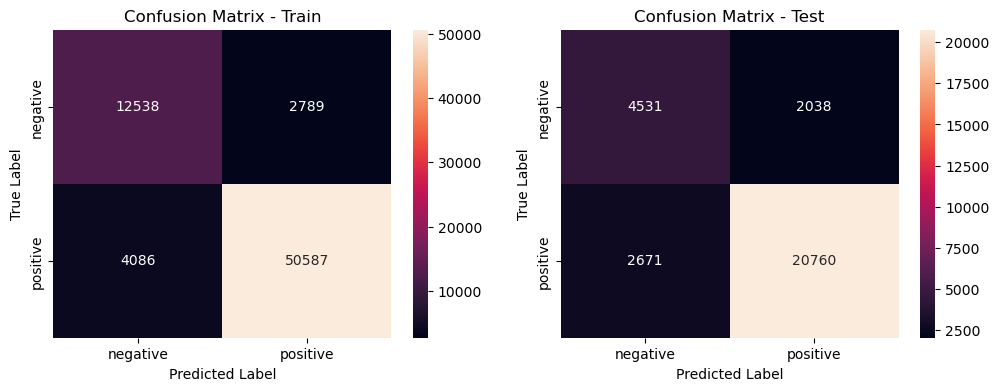

In [88]:
plot_confusion_matrixes(rfr_bp,X_train_bow,y_train,X_test_bow,y_test)

Top 20 features are: 
                   coef
great         0.030292
bad           0.023931
love          0.021625
would         0.016574
delicious     0.015791
perfect       0.013016
highly        0.009805
waste         0.008276
return        0.008178
ok            0.007946
wonderful     0.007701
easy          0.007651
disappointed  0.007308
however       0.007187
money         0.006822
thank         0.006370
good          0.006229
taste         0.005988
awful         0.005961
favorite      0.005865


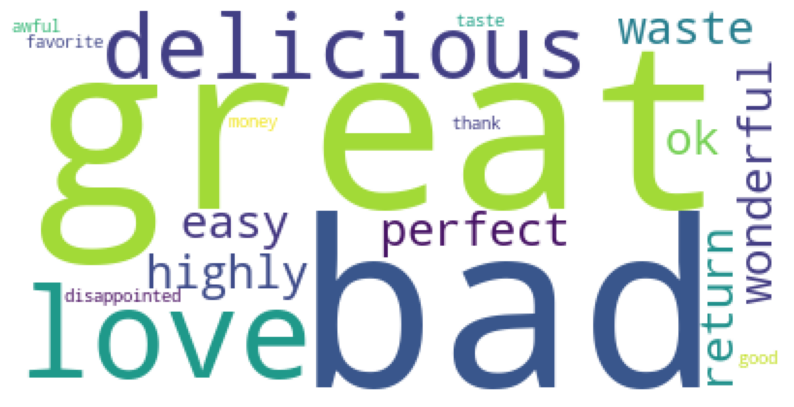

In [98]:
from wordcloud import WordCloud
df = rfr_bp.feature_importances_
features = bow_features
df = pd.DataFrame(df,columns=['coef'],index=features)
top = df.sort_values(by='coef',ascending=False).head(20)
print('Top 20 features are: \n {}'.format(top))
top['words'] = top.index
top.reset_index(drop=True)
sent = top.words.str.cat(sep=' ')
#word cloud representation
wordcloud = WordCloud(background_color='white').generate(sent)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


# 2. TFIDF

In [101]:
X_train_tfidf = pickle.load(open('tfidf_vectors/X_train_tfidf','rb'))
X_test_tfidf = pickle.load(open('tfidf_vectors/X_test_tfidf','rb'))
tfidf_features = pickle.load(open('tfidf_vectors/tfidf_features','rb'))

In [103]:
rfr2 = RandomForestClassifier(n_jobs = -1, class_weight = 'balanced')
num_estimator = [5,10,50,100,120]
maximum_depth = [1, 5, 7, 10, 15, 25, 30]
parameter = {
    'n_estimators': num_estimator,
    'max_depth': maximum_depth
}
grid2 = GridSearchCV(estimator = rfr2, param_grid = parameter , cv =5, n_jobs=-1, scoring= 'roc_auc', return_train_score = True )
grid2.fit(X_train_tfidf,y_train)

print('Best Parameter:',grid.best_params_)

Best Parameter: {'max_depth': 25, 'n_estimators': 120}


In [107]:
train_auc = grid2.cv_results_['mean_train_score'].reshape(7,5)
test_auc = grid2.cv_results_['mean_test_score'].reshape(7,5)

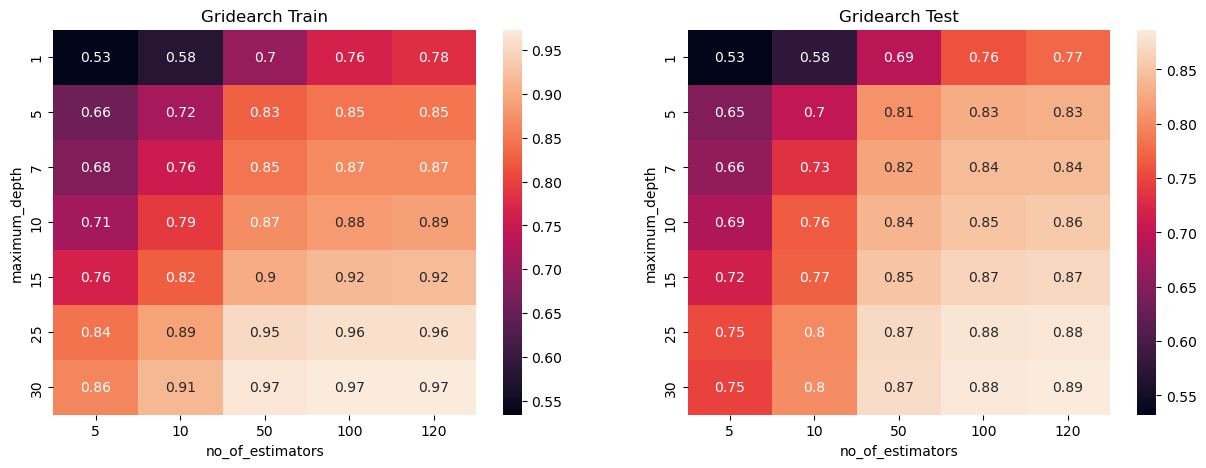

In [109]:
f, axes = plt.subplots(1, 2,figsize=(15,5))

for i in range(2):
    title = train_auc if i ==0 else test_auc
    sns.heatmap(title,xticklabels = num_estimator, yticklabels = maximum_depth, annot =True, ax = axes[i])
    axes[i].set_title(f"Gridearch {'Train' if i==0 else 'Test'}")
    axes[i].set_xlabel("no_of_estimators")
    axes[i].set_ylabel("maximum_depth") 

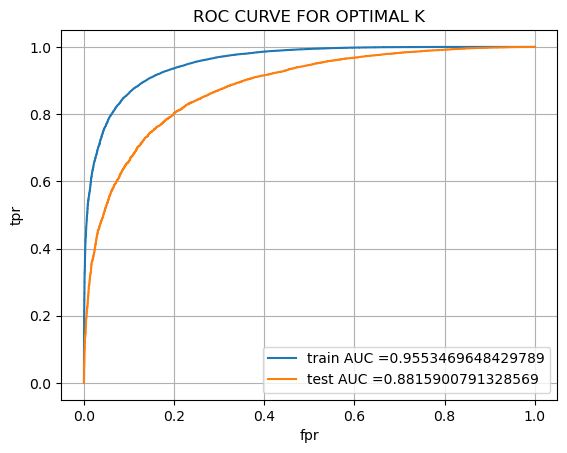

Area under train roc 0.9553469648429789
Area under test roc 0.8815900791328569


In [115]:
rfr_bp2 = RandomForestClassifier(**grid.best_params_,class_weight = 'balanced')
rfr_bp2 = rfr_bp2.fit(X_train_tfidf,y_train)
train_fpr, train_tpr, thresholds = roc_curve(y_train, rfr_bp2.predict_proba(X_train_tfidf)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, rfr_bp2.predict_proba(X_test_tfidf)[:,1])
plt.grid(True)
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC CURVE FOR OPTIMAL K")
plt.show()

#Area under ROC curve
print('Area under train roc {}'.format(auc(train_fpr, train_tpr)))
print('Area under test roc {}'.format(auc(test_fpr, test_tpr)))

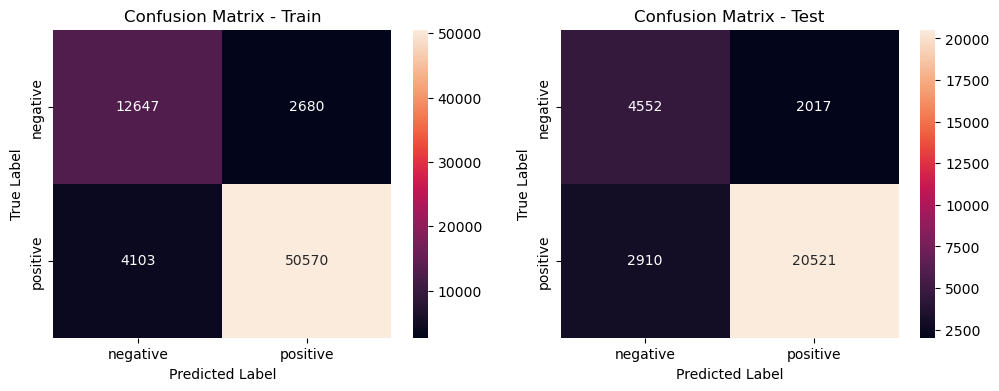

In [117]:
plot_confusion_matrixes(rfr_bp2,X_train_tfidf,y_train,X_test_tfidf,y_test)

Top 20 features are: 
                coef
great      0.035407
bad        0.018747
love       0.018561
delicious  0.016621
perfect    0.015956
would      0.015457
easy       0.011828
favorite   0.011240
throw      0.009744
good       0.009161
think      0.008896
highly     0.007962
wonderful  0.007707
money      0.007506
excellent  0.007076
waste      0.006958
terrible   0.006447
return     0.006421
maybe      0.006285
review     0.006256


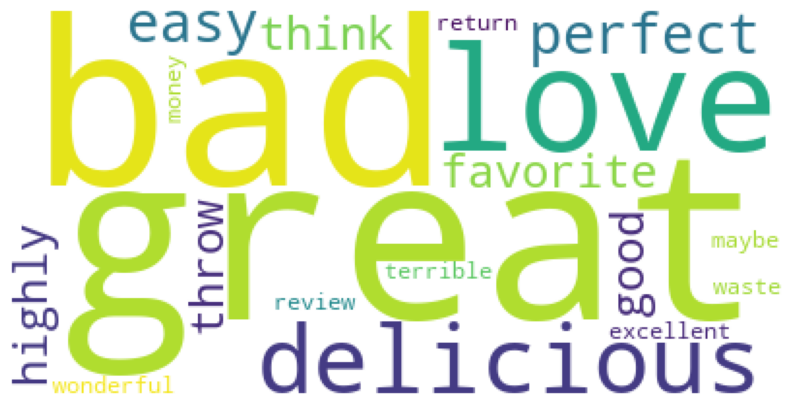

In [121]:
from wordcloud import WordCloud
df = rfr_bp2.feature_importances_
features = bow_features
df = pd.DataFrame(df,columns=['coef'],index=features)
top = df.sort_values(by='coef',ascending=False).head(20)
print('Top 20 features are: \n {}'.format(top))
top['words'] = top.index
top.reset_index(drop=True)
sent = top.words.str.cat(sep=' ')
#word cloud representation
wordcloud = WordCloud(background_color='white').generate(sent)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# 3. Average Word2Vec

In [126]:
X_train_avgw2v = pickle.load(open('w2v/avgw2v_train','rb'))
X_test_avgw2v = pickle.load(open('w2v/avgw2v_test','rb'))
w2v_words = pickle.load(open('w2v/w2v_words','rb'))

In [130]:
rfr3 = RandomForestClassifier(n_jobs = -1, class_weight = 'balanced')
num_estimator = [5,10,50,100,120]
maximum_depth = [1, 5, 7, 10, 15, 25, 30]
parameter = {
    'n_estimators': num_estimator,
    'max_depth': maximum_depth
}
grid3 = GridSearchCV(estimator = rfr3, param_grid = parameter , cv =5, n_jobs=-1, scoring= 'roc_auc', return_train_score = True )
grid3.fit(X_train_avgw2v,y_train)

print('Best Parameter:',grid.best_params_)

Best Parameter: {'max_depth': 25, 'n_estimators': 120}


In [132]:
train_auc = grid3.cv_results_['mean_train_score'].reshape(7,5)
test_auc = grid3.cv_results_['mean_test_score'].reshape(7,5)

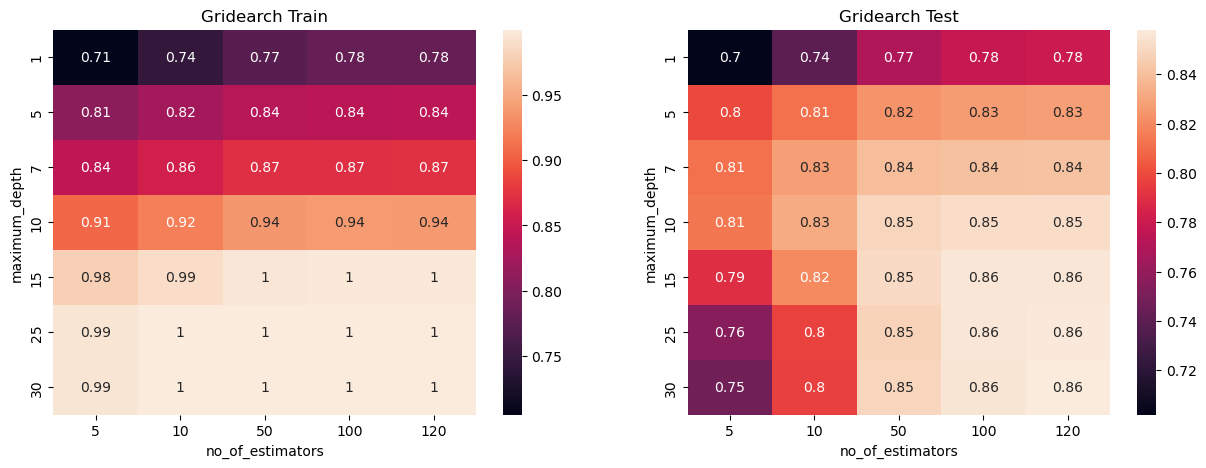

In [134]:
f, axes = plt.subplots(1, 2,figsize=(15,5))

for i in range(2):
    title = train_auc if i ==0 else test_auc
    sns.heatmap(title,xticklabels = num_estimator, yticklabels = maximum_depth, annot =True, ax = axes[i])
    axes[i].set_title(f"Gridearch {'Train' if i==0 else 'Test'}")
    axes[i].set_xlabel("no_of_estimators")
    axes[i].set_ylabel("maximum_depth")

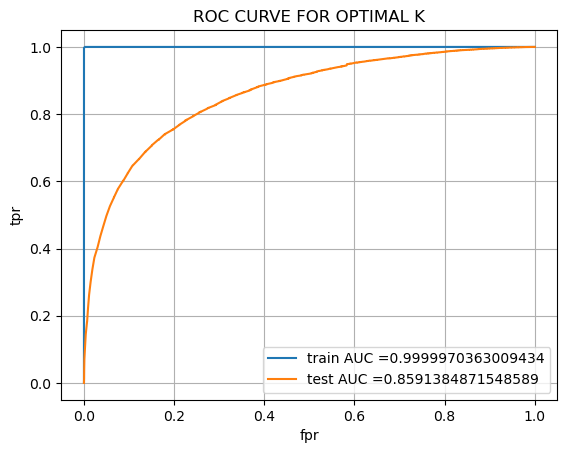

Area under train roc 0.9999970363009434
Area under test roc 0.8591384871548589


In [136]:
rfr_bp3 = RandomForestClassifier(**grid3.best_params_,class_weight = 'balanced')
rfr_bp3 = rfr_bp3.fit(X_train_avgw2v,y_train)
train_fpr, train_tpr, thresholds = roc_curve(y_train, rfr_bp3.predict_proba(X_train_avgw2v)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, rfr_bp3.predict_proba(X_test_avgw2v)[:,1])
plt.grid(True)
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC CURVE FOR OPTIMAL K")
plt.show()

#Area under ROC curve
print('Area under train roc {}'.format(auc(train_fpr, train_tpr)))
print('Area under test roc {}'.format(auc(test_fpr, test_tpr)))

#### in avgW2v model is overfitted in Traning data , but performing good in test data

## Observation and Calculation

In [142]:
from prettytable import PrettyTable

In [144]:
z = PrettyTable()

z.field_names = ["Vector","Algorithm","Hyperparam-min_sample_splits","Hyperparam-max_Depth","Train AUC", "Test AUC"]
z.add_row(["bow","Random Forest",120,25, 0.95,0.88])
z.add_row(["tfidf","Random Forest",120,25,0.95, 0.88 ])
z.add_row(["avgw2v","Random Forest",120,25, 0.99,0.86])
print(z)


+--------+---------------+------------------------------+----------------------+-----------+----------+
| Vector |   Algorithm   | Hyperparam-min_sample_splits | Hyperparam-max_Depth | Train AUC | Test AUC |
+--------+---------------+------------------------------+----------------------+-----------+----------+
|  bow   | Random Forest |             120              |          25          |    0.95   |   0.88   |
| tfidf  | Random Forest |             120              |          25          |    0.95   |   0.88   |
| avgw2v | Random Forest |             120              |          25          |    0.99   |   0.86   |
+--------+---------------+------------------------------+----------------------+-----------+----------+
